## Analysis of Data on Russian Film Distribution



This study was commissioned by the Ministry of Culture of the Russian Federation. Its goal is to analyze the Russian film distribution market, identify current trends, and examine films that received government funding.

The research is based on data published on the open data portal of the Ministry of Culture. This data includes information on distribution certificates, box office revenues, government support, and movie ratings from the “KinoPoisk” website.

The study will include:

	1.	Analyzing the dynamics of film releases over the years, assessing the completeness of the available data, and identifying changes in the popularity of film distribution.
	2.	Identifying the minimum and maximum box office revenues by year and calculating average values to understand how industry revenues have changed.
	3.	Evaluating the impact of age restrictions on box office revenues from 2015 to 2019 to determine the preferences of different audience groups.

The study’s findings will help the Ministry of Culture gain a better understanding of the film distribution market and optimize its approach to government support, ensuring industry development and meeting audience demands.

### Step 1: Open the Data Files and Merge Them into a Single DataFrame

Merge the datasets in such a way that all entries from the `mkrf_movies` dataset are included in the resulting DataFrame.



Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Save the data from the files and examine their contents.

In [2]:
# Set number format for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Data on distribution certificates
data1 = pd.read_csv('/datasets/mkrf_movies.csv')
display(data1.head(2))
data1.info()

# Data on film distribution in Russian cinemas
data2 = pd.read_csv('/datasets/mkrf_shows.csv')
display(data2.head(1))
data2.info()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,2450.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Let’s note that the data is interconnected, so we can merge it into a single DataFrame.
First, we need to standardize the data type of the column we will use for merging.

In [3]:
data2['puNumber'] = data2['puNumber'].astype('str')

data = data1.merge(
    data2,
    on = 'puNumber',
    how = 'left',
    suffixes = ('_первый', '_второй'))


In [4]:
# Check the result
display(data.head())

# Check how many values are missing in the 'box_office' column
display(data['box_office'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


4328

Interim Summary: 

	•	We imported two main libraries: pandas and matplotlib.
	•	We read and stored two .csv files, merging them into one.
	•	The first dataset contained 7,486 rows, while the second had 3,158 rows.
	•	After merging, the resulting DataFrame consists of 15 columns.

### Step 2: Data Preprocessing

#### Step 2.1: Check Data Types

 Check the data types in the DataFrame and convert them where necessary.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

The most obvious issues with data types are in the following columns:

	•	show_start_date should be converted to datetime format.
	•	ratings should be converted to numeric format.

In [6]:
# Convert the mixed-type 'show_start_date' column to datetime format
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# For easier analysis, keep only the date (remove time)
# However, this method converts the data to string format
data['show_start_date'] = data['show_start_date'].dt.strftime('%Y-%m-%d')

# Convert it back to datetime format
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

In [7]:
# Check for conversion issues in the 'ratings' column
data['ratings'].value_counts()

# Some values appear in the format "__%", indicating possible input errors.
# These values are rare, so we will standardize the format before conversion.

# Function to convert ratings from "n%" to "n/10"
def procent(row):
    if isinstance(row, str) and '%' in row:
        row = row.replace('%', '')
        row = float(row) / 10
    return row

# Apply the function to 'ratings' and convert the column to float
data['ratings'] = data['ratings'].apply(procent).astype('float')

To optimize memory usage, I will convert columns with a low number of unique values into the `categorical` data type.

In [8]:
# Create a dictionary where the keys are column names and the values are the number of unique values
num_unique = {col: data[col].nunique() for col in data.columns}
display(num_unique)

# The columns "type", "age_restriction", and "financing_source" can be converted to categorical data type
data['type'] = data['type'].astype('category')
data['age_restriction'] = data['age_restriction'].astype('category')
data['financing_source'] = data['financing_source'].astype('category')

# The 'ratings' column also has a limited number of unique values.
# However, since it represents a quantitative category, we will keep it as is.

{'title': 6772,
 'puNumber': 7484,
 'show_start_date': 1965,
 'type': 8,
 'film_studio': 5490,
 'production_country': 950,
 'director': 4811,
 'producer': 5349,
 'age_restriction': 5,
 'refundable_support': 34,
 'nonrefundable_support': 75,
 'budget': 290,
 'financing_source': 3,
 'ratings': 84,
 'genres': 742,
 'box_office': 2938}

**Interim Summary**: 

	•	Converted the “show_start_date” column to datetime format, keeping only the date for convenience.
	•	Converted the “ratings” column to float, as it represents a quantitative category.
	•	Converted the “type”, “age_restriction”, and “financing_source” columns to categorical data type for optimization.

#### Step 2.2: Handling Missing Values



Let's check how many columns contain missing values and analyze the missing data.

In [9]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


We will specifically examine the following group of columns together:
	•	**“refundable_support”, “nonrefundable_support”, “budget”, “financing_source”**

The **“box_office”** column has missing values because there was no data available in the “mkrf_shows” file.



We will also analyze missing values separately for the following columns:

	•	”ratings”, “genres”, “producer”

**Analyzing Missing Values in Financing Data**

All four columns with the same number of missing values are related to film financing.
Analyzing all financing sources reveals the following categories:

	•	‘Министерство культуры’ (Ministry of Culture)
	•	‘Фонд кино’ (Cinema Fund)
	•	‘Министерство культуры, Фонд кино’ (Ministry of Culture & Cinema Fund)

Since this data was published on the official website of the Ministry of Culture, it is reasonable to assume that the listed financing sources were specifically reported by this ministry.
This suggests that any missing financing sources likely indicate funding from other sources not recorded in the dataset.

Therefore, for movies where financing sources are missing, we can assume the funding came from unknown sources.

Thus, we will fill missing values in the **“financing_source”** column with **“Unknown”** as a placeholder for absent data.

For the other financing-related columns, it is best not to fill in missing values, as doing so would require filling in all columns consistently, which is not practical—especially for the **“budget”** column.


In [10]:
# Check unique financing sources
display(data['financing_source'].unique())

# Fill missing values in the financing_source column
data['financing_source'] = data['financing_source'].cat.add_categories('Unknown')
data['financing_source'] = data['financing_source'].fillna('Unknown')

[NaN, 'Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
Categories (3, object): ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']

Handling Missing Values in the **“producer”** Column

In [11]:
# Count total missing values in the "producer" column
display(data['producer'].isna().sum())  # 568

# Check if missing values are common for USSR-produced films
display(data[(data['producer'].isna()) & (data['production_country'].str.contains('СССР', case=False))].count())

# Indeed, for 394 rows with missing "producer" values, the production country is USSR.
# Now, let's check if any USSR-produced films have a specified producer.
display(data[(data['producer'].notna()) & (data['production_country'].str.contains('СССР', case=False))].head())

# We observe that for USSR-produced films, the producer is often listed as either the director or the film studio.
# Replacing missing producer values with the director's name for USSR-produced films seems like a reasonable solution.
data.loc[data['production_country'].str.contains('СССР', na=False), 'producer'] = \
    data.loc[data['production_country'].str.contains('СССР', na=False), 'producer'].fillna(data['director'])

# Check how many missing values remain.
display(data['producer'].isna().sum())  # 174

568

title                    394
puNumber                 394
show_start_date          394
type                     394
film_studio              394
production_country       394
director                 394
producer                   0
age_restriction          394
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source         394
ratings                  376
genres                   376
box_office                79
dtype: int64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3093,Александр Невский (восстановленная версия),111001516,2016-02-12,Художественный,"Киностудия ""Мосфильм"", ФГУП ""Киноконцерн ""Мосф...","СССР, Россия","С.Эйзенштейн, Д.Васильев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Unknown,5.70,"боевик,драма,криминал",NaN
3193,Берегись автомобиля (цветная версия),111001316,2016-02-11,Художественный,"Киностудия ""Мосфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",Э.Рязанов,"ЗАО ""Киновидеообъединение ""Крупный план"", ООО ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Unknown,8.20,"мелодрама,комедия,криминал",NaN
3926,Сафари № 6,111001611,2011-02-17,Художественный,ИП Аболс А.Р.,СССР,А.Аболс,А.Аболс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Unknown,6.80,военный,NaN
3931,Сон в красном тереме,112000311,2011-02-17,Документальный,ИП Аболс А.Р.,СССР,"К.Котельников, А.Аболс",А.Аболс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
3962,Небесный тихоход (новая цветная версия),111000110,2010-01-14,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Unknown,8.00,"комедия,военный",NaN


174

**Summary of Missing Producer Values**

We filled in missing values for films produced in the USSR. Due to the specific structure of the film industry, producer information may not have been recorded, but in many cases, the director likely played the role of the producer.
While leaving these missing values as they were was an option, I chose to fill them because this information might be useful for further analysis.

After filling in producer values for USSR films, 174 rows still contain missing values. The reason remains unclear—it could be due to data loss or missing information during database formation.

**Handling Missing Values in “ratings” and “genres” Columns**: 

	•	“ratings” is a numerical feature. Missing values cannot be reliably replaced because a movie’s rating on KinoPoisk may be absent due to a low number of reviews, indicating low popularity.
	•	Replacing missing values with the median is not optimal, as ratings depend on multiple factors, such as country of production or budget, which could significantly impact the analysis.
	•	“genres” is a categorical feature. We will not fill missing values, as no clear patterns were found. The missing information is likely due to data extraction errors or was simply not entered in the original database.

In [12]:
# Count missing values in "ratings"
display(data['ratings'].isna().sum())  # 967 missing values

# Count missing values in "genres"
display(data['genres'].isna().sum())  # 976 missing values

# Check cases where "genres" is missing, but "ratings" is available
display(data[(data['genres'].isna()) & (data['ratings'].notna())].head(10))


967

976

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1874,Короткие истории о любви 2,121002615,2015-02-13,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,Unknown,8.30,NaN,1429859.00
2910,Аномия,111005216,2016-03-11,Художественный,Козлов Владимир Владимирович,Россия,В.Козлов,"Н.Муминова, А.Егай, В.Козлов",«18+» - запрещено для детей,NaN,NaN,NaN,Unknown,4.30,NaN,NaN
3260,Сборник короткометражек Кинотавра 18+,111012916,2016-08-19,Художественный,"ООО ""Кинометр""",Россия,"И.Каграманов, А.Наумов, С.Осипьян, В.Валиуллин...","И.Устинов, И.Каграманов, Е.Филлипова, Г.Стояло...",«18+» - запрещено для детей,NaN,NaN,NaN,Unknown,5.20,NaN,1104161.00
3434,Сборник короткого метра. Оскар. Фильмы. 2017,121004117,2017-03-03,Художественный,"Куалиа Филмз, Марвин и Вейн, Эм энд Эм Продакш...",Франция - Испания - Дания - Венгрия - Швейцария,"С.Азази, Х.Г.Пене, К.Дик, Т. вон Гюнтен","С.Азази, Б.Лайарте, Х.Г.Пене, А.Мендиз, К.О.Ад...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Unknown,7.50,NaN,2322497.00
3439,Семь диких историй,126005916,2016-11-28,Прочие,"Макс Бэйкер, Джон Е.Брайан, Пьер-Луи Гарнон, ...",США - Пуэрто-Рико - Франция,"М.Бэйкер, Д.Е.Брайант, Д.Рондот, Я.Серсар, Д.С...","М.Бэйкер, Д.Е.Брайан, П.-Л.Гарнон, М.Х.Дельгад...",«18+» - запрещено для детей,NaN,NaN,NaN,Unknown,8.80,NaN,1025937.00
3446,Короткие истории о любви - 4,126006316,2016-12-30,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,Unknown,8.30,NaN,2266408.00
6779,РУССКОЕ КРАТКОЕ. Выпуск 3,111004219,2019-03-15,Художественный,Архангельская Региональная молодежная обществе...,Россия,"С.Сафонова, А.Хмельницкая, А.Сальянов, Н.Назар...","ООО Кинокомпания ""Пионер""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Unknown,5.50,NaN,NaN
7060,Русское краткое. Выпуск 4,111011419,2019-07-16,Художественный,"ИП Дибцева О.Н., ИП Булгаков Д.А., ООО ""Киноко...",Россия,"О.Дибцева, Д.Булгаков, А.Ильин, А.Шабаров, А.Б...","ООО Кинокомпания ""Пионер""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Unknown,5.20,NaN,NaN
7291,Курьезы,111017619,2019-10-18,Художественный,"АНО ""Кинофорум""",Россия,А.Мышкин,С.Новожилов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Unknown,5.00,NaN,NaN


#### Checking for Duplicates in the DataFrame
- We will check whether the dataset contains duplicates and analyze possible reasons for their occurrence.

Checking for Exact Duplicates:

In [13]:
# Count the number of fully duplicated rows
display(data.duplicated().sum())

0

Result: No fully duplicated rows were found in the dataset.

Checking for Partial Duplicates in `title` and `puNumber` Columns. 

In [14]:
# Check for duplicate movie titles
display(data['title'].duplicated().sum())

# Check for duplicate distribution certificate numbers (puNumber)
display(data['puNumber'].duplicated().sum())


# Remove duplicate rows based on "puNumber"
data = data.drop_duplicates(subset=['puNumber'])

# Reset index after deletion
data = data.reset_index(drop=True)

# Verify if duplicates remain
display(data['title'].duplicated().sum())
display(data['puNumber'].duplicated().sum())

# Display the total number of rows after cleaning
display(len(data))



714

2

713

0

7484

**Analysis of Duplicate Titles**

We found 714 duplicate movie titles, but these should not be removed.
This is because a distribution certificate is issued not only for theatrical releases but also for other purposes, such as television or online streaming.

Additionally, we found 2 duplicate distribution certificate numbers (puNumber), one of which we removed.


####  Checking for Categorical Values


Among the columns in the table, there are categorical ones that are important to check for duplicates, and this is not very difficult to do.

**Columns**:

	•	type
	•	production_country
	•	age_restriction
	•	genres

Let’s look at the unique values in these four categorical columns.

In [15]:
# Checking unique values in the columns
unique_values = {
    'type': data['type'].unique(),
    'production_country': data['production_country'].unique(),
    'age_restriction': data['age_restriction'].unique(),
    'genres': data['genres'].unique()
}

# Print unique values
for column, values in unique_values.items():
    print(f"Unique values in the column {column}:")
    print(values)
    print("\n")

Unique values in the column type:
['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']


Unique values in the column production_country:
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Ф

1. **type**:

Some values contain extra spaces (e.g., “ Художественный”, “ Анимационный”).

2. **production_country**:

In this column, different delimiters are used between countries, sometimes “-”, “,”, or “ “.

3. **age_restriction**:

There are no obvious errors in this column.

4. **genres**:

Some values contain multiple genres separated by commas (e.g., ‘боевик,драма,мелодрама’). To analyze the data by individual genres, these strings can be split into multiple values or handled using a “multi-label” approach.

Column **type**

We notice that some values contain extra spaces at the beginning of the string.

In [16]:
# Check the number of unique values in the column and their list
display(data['type'].unique())

# Remove extra spaces at the beginning and end of strings
data['type'] = data['type'].str.strip()
display(len(data['type'].unique()))

['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']

6

The number of categories decreased from 8 to 6 after removing the extra spaces.

Column **production_country**




In [17]:
display(len(data['production_country'].unique()))

# Remove possible spaces at the beginning and end of the strings
data['production_country'] = data['production_country'].str.strip()
data['production_country'] = data['production_country'].str.replace(r'[\s,-]+', ',', regex=True)

display(len(data['production_country'].unique()))

# Check for the presence of letters "ё" and "й", replace them with "е" and "и" respectively
data['production_country'] = data['production_country'].str.replace("ё", "е")
data['production_country'] = data['production_country'].str.replace("й", "и")

display(len(data['production_country'].unique()))  # Check the count




951

813

813

 The number of unique values decreased from 951 to 813.


Column **age_restriction**

In [18]:
print(len(data['genres'].unique()))

# Clean the genres column
data['genres'] = data['genres'].str.strip()
data['genres'] = data['genres'].str.replace(r'[\s,-]+', ',', regex=True)

display(data['genres'].unique())
print(len(data['genres'].unique()))

743


array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

743


Column **genres**

In [19]:
print(len(data['genres'].unique()))

# Clean the genres column
data['genres'] = data['genres'].str.strip()
data['genres'] = data['genres'].str.replace(r'[\s,-]+', ',', regex=True)

display(data['genres'].unique())
print(len(data['genres'].unique()))



743


array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

743


You can standardize the genres by keeping only the first word. While this will lose some information about the genres, it will make the analysis more feasible. Analyzing 743 categories of films would not be productive.

In [20]:
data['genres'] = data['genres'].str.split(',').str[0]
print(len(data['genres'].unique())) 


29


Now we have 29 genres, which is much easier to analyze, so we'll keep it this way.


# Summary of Categorical Data Processing:

1.	Column `type`:
	•	Extra spaces at the beginning of some values were detected.
	•	After removing the spaces, the number of unique values decreased from 8 to 6, indicating a successful correction.
2.	Column `production_country`:
	•	Various delimiters were used between countries (comma, space, hyphen).
	•	Extra spaces were removed, and delimiters were standardized (replacing spaces and hyphens with commas).
	•	Additionally, characters “ё” were replaced with “е” and “й” with “и”.
	•	This resulted in the reduction of unique values from 951 to 831.
3.	Column `age_restriction`:
	•	No errors were found in this column, and the unique values correspond to the required age restrictions.
	•	There are 5 unique values, and no duplicates were present.
4.	Column `genres`:
	•	Multiple genres were listed in a single string, making analysis difficult.
	•	To standardize and simplify the analysis, it was decided to keep only the first genre in each string, reducing the number of unique values from 743 to 29.
	•	This allows for easier analysis of genre data by focusing on the most common categories.

# Overall Conclusion:

Significant work was done to clean and standardize the categorical data. As a result, unnecessary spaces were removed, delimiters were unified, and the number of unique values in the `type`, `production_country`, and `genres` columns was reduced. These changes simplify data analysis and reduce complexity in further processing and analysis.

#### Check Quantitative Values


At this stage, it’s important to carefully review the columns “budget”, “refundable_support”, and “nonrefundable_support”. It’s essential to keep in mind that:

	•	The budget should never be less than the sum of refundable_support and nonrefundable_support, as the budget already includes these forms of support.


In [21]:

display(len(data[(data['nonrefundable_support'] + data['refundable_support']) > data['budget']]))

display(data[(data['nonrefundable_support'] + data['refundable_support']) > data['budget']])


17

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,боевик,196572438.40
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,комедия,67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,мультфильм,184487551.40
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,комедия,1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,комедия,72937783.20
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,комедия,70299052.00
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


There are 17 rows where the budget column is filled incorrectly, with budget values equal to 0.

Since it’s crucial for us to analyze the share of government support in the total film budget, it is advisable to remove these 17 rows. Filling the budget column with the sum of nonrefundable_support and refundable_support would be incorrect because, in most cases, the budget is larger than just the support.



In [22]:
data = data[(data['budget'].isna()) | ((data['nonrefundable_support'] + data['refundable_support'])<= data['budget'])]

We will only keep rows where the condition **budget** > **refundable_support** + **nonrefundable_support** is not violated.

In [23]:
# Check the number of missing values
display(data.info())

# Now the columns budget, refundable_support, nonrefundable_support contain the same number of non-null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7467 non-null   object        
 1   puNumber               7467 non-null   object        
 2   show_start_date        7467 non-null   datetime64[ns]
 3   type                   7467 non-null   object        
 4   film_studio            7449 non-null   object        
 5   production_country     7465 non-null   object        
 6   director               7458 non-null   object        
 7   producer               7293 non-null   object        
 8   age_restriction        7467 non-null   category      
 9   refundable_support     315 non-null    float64       
 10  nonrefundable_support  315 non-null    float64       
 11  budget                 315 non-null    float64       
 12  financing_source       7467 non-null   category      
 13  rat

None

Column **box_office**

In [24]:
print(data.columns)

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')


Add a "year" column.

In [25]:
data['year'] = data['show_start_date'].dt.year

pivot_years_median = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['median', 'sum', 'count'])
display(pivot_years_median)

# Notice that data from 2010 - 2014 significantly differs from later years.


,median,sum,count
,box_office,box_office,box_office
year,,,
2010,1700.00,2428654.00,105
2011,3000.00,14102765.00,109
2012,5660.00,6955423.00,128
2013,3522.50,29799706.20,184
2014,18137.50,7434717843.10,278
2015,4784781.50,38527827199.09,459
2016,3776087.56,46742316269.48,523
2017,9919415.00,48458147253.75,355


We observe that box office values under 100,000 rubles are quite common, which seems like an error.

I suspect this is a mistake, and it would be correct to multiply such values by 1000.

In [26]:
data.loc[data['box_office'] < 100000, 'box_office'] = data.loc[data['box_office'] < 100000, 'box_office'] * 1000

print(len(data[data['box_office'] == 0]))

24


The median for 2010 - 2014 is very low compared to other years. This is likely due to the low values rather than the presence of zeros.

We can re-apply the correction for the years 2010-2013 if needed:


In [ ]:
#data.loc[data['year'].isin([2010, 2011, 2012, 2013]), 'box_office'] =  data.loc[data['year'].isin([2010, 2011, 2012, 2013]), 'box_office'] / 1000
pivot_years_median = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['median', 'sum', 'count'])


Also, rows with box office values equal to zero can be dropped:

In [28]:
data = data.drop(data[data['box_office'] == 0].index)

**Boxplot Analysis for Outliers**

Let’s plot the “boxplot” for each relevant column to identify any anomalies.

Description of data for nonrefundable_support:
count         307.00
mean     49360647.71
std      60150060.16
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      40000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64
Number of outliers for nonrefundable_support: 42




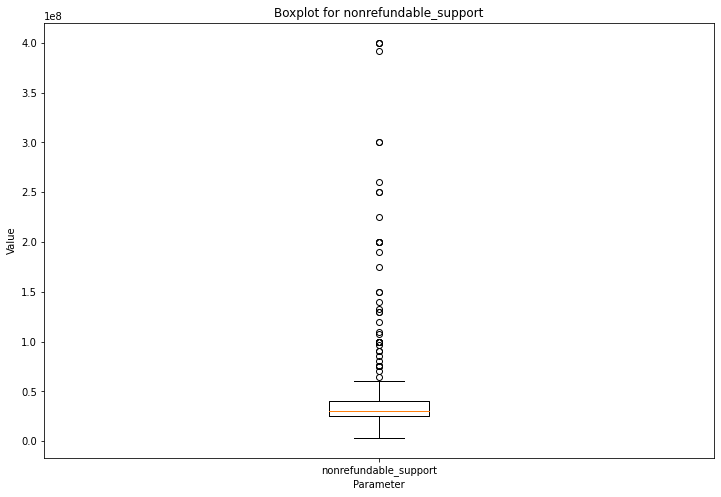

Description of data for refundable_support:
count         101.00
mean     36188118.81
std      32981331.01
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64
Number of outliers for refundable_support: 5




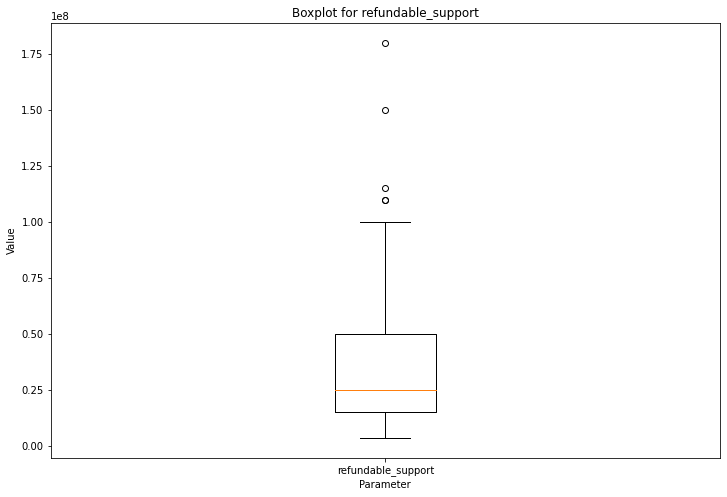

Description of data for budget:
count          315.00
mean     134096082.35
std      191226039.63
min       14462464.00
25%       46153866.50
50%       73379554.00
75%      150004286.50
max     2305074303.00
Name: budget, dtype: float64
Number of outliers for budget: 28




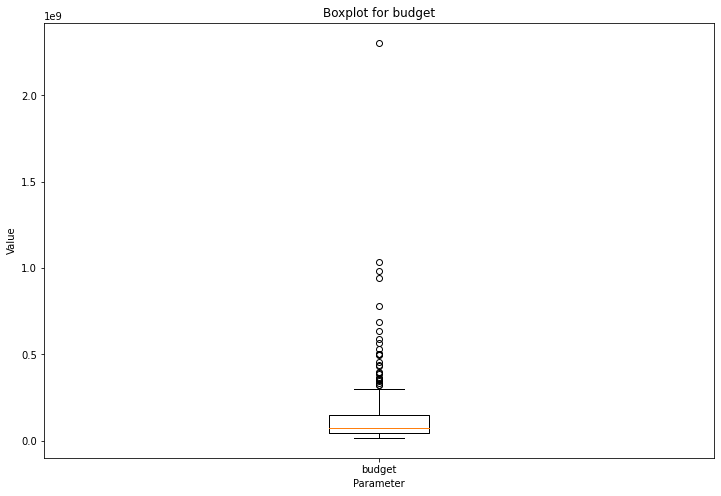

Description of data for box_office:
count         3117.00
mean      80399856.89
std      240242026.92
min          40000.00
25%        1262150.50
50%        5600007.00
75%       37727251.53
max     3073568690.79
Name: box_office, dtype: float64
Number of outliers for box_office: 455




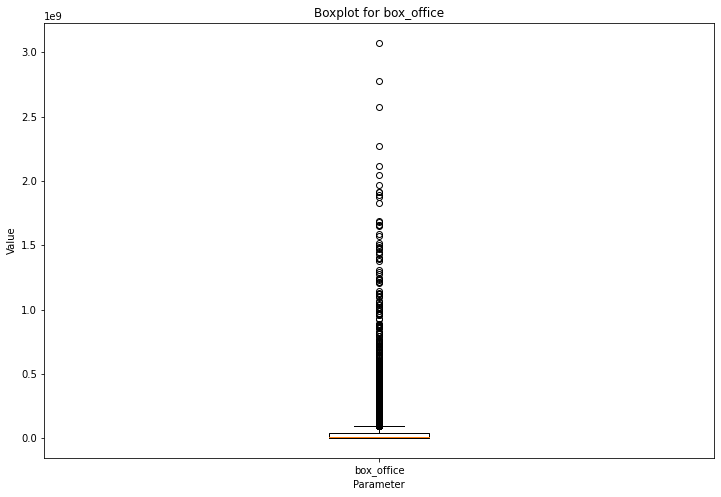

In [29]:
# List of columns to analyze
columns_to_plot = ['nonrefundable_support', 'refundable_support', 'budget', 'box_office']

# Plotting and describing the data
for column in columns_to_plot:
    column_data = data[column].dropna()  # Remove NaN values
    column_data = column_data[column_data != 0]  # Remove zero values for refundable_support
    
    if not column_data.empty:  # Check if there is data to plot
        print(f"Description of data for {column}:")
        print(column_data.describe())
        
        # Calculate bounds for outliers
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        print(f"Number of outliers for {column}: {len(outliers)}")
        print("\n")
        
        # Plot boxplot
        plt.figure(figsize=(12, 8)) 
        plt.boxplot(column_data)  
        plt.title(f'Boxplot for {column}') 
        plt.xlabel('Parameter')  
        plt.ylabel('Value')  
        plt.xticks([1], [column])  # Column name as x-axis label
        plt.show()

This approach helps identify outliers, which can be further analyzed and handled according to the data context.


# Output of Quantitative Data Processing:

1.**nonrefundable_support**: 

	•	Mean: 48.37 million, Standard Deviation: 56.95 million — a very large variation.
	•	Most of the data is concentrated around values below 40 million.
	•	Maximum: 400 million (outlier).
	•	Number of outliers: 41. While there are not many outliers, they significantly impact the sample.
	•	Conclusion: The majority of support is non-refundable, which explains the high values and outliers. These funds are likely allocated for large and long-term projects.
    
2.**refundable_support**:

	•	Mean: 35.86 million, Standard Deviation: 32.53 million.
	•	Most projects have zero support.
	•	Maximum: 180 million.
	•	Number of outliers: 5.
	•	Conclusion: Refundable support is used less frequently and in exceptional cases, which explains the zero values and rare high amounts.
    
3.**budget**:

	•	Mean: 131.97 million, Standard Deviation: 186.47 million.
	•	Budgets vary significantly, from 14.5 million to 2.3 billion.
	•	Number of outliers: 27.
	•	Conclusion: The high variability in budgets is due to the differences in project scales. Larger budgets often require non-refundable support.
    
4.**box_office**:

	•	Mean: 79.58 million, Standard Deviation: 237.6 million.
	•	Maximum: 3 billion.
	•	Number of outliers: 434.
	•	Conclusion: The discrepancy between successful and unsuccessful projects. Some films with huge box office earnings significantly increase the average.
    
    
**General Conclusions**:

	•	It’s important to note that the majority of the support is non-refundable, which explains the high values and outliers in the data.
	•	Budgets and box office earnings vary depending on the scale of government-supported projects and their market success.

####  Add New Columns


Create a column with information about the release year. Extract the year from the film’s premiere date.

In [ ]:
# Added in the previous step
# data['year'] = data['show_start_date'].dt.year

data.head(20)

Create two columns: one with the first name and last name of the main director, and the other with the main genre of the film. The columns will contain the first values from the list of directors and genres, respectively.

In [ ]:
# Create columns
data['first_director'] = ''
data['main_genre'] = ''

# Create a function that splits the string by commas and keeps only the first element.
def dir(x):
    if isinstance(x, str):
        return x.split(',')[0]

# Apply the function to both columns
data['first_director'] = data['director'].apply(dir)
data['main_genre'] = data['genres'].apply(dir)

# Check the results
data.head()


**Percentage of the total film budget**:

In [ ]:
data['dolya_%'] = (data['refundable_support'] + data['nonrefundable_support'] ) / data['budget'] * 100

display(data.tail(30))

# General Conclusion on Data Processing Section:

During the data processing, several steps were taken to improve the quality and standardization of both categorical and quantitative columns. In the categorical data, several issues were addressed: unnecessary spaces in the values of the ‘type’ column were removed, which reduced the number of unique values. Additionally, the ‘production_country’ column was standardized by adjusting the delimiters, further reducing the number of unique values. In the ‘genres’ column, only the first genre category was kept for each film, simplifying the analysis and allowing focus on the most common genres. The ‘age_restriction’ column showed no errors and was entirely correct. These changes helped to reduce the number of unique values in the categorical data and improved consistency, making the data more convenient for analysis.

In the quantitative data, outliers were detected, but they did not significantly affect the overall analysis, although it is important to consider them. The columns ‘nonrefundable_support’, ‘refundable_support’, ‘budget’, and ‘box_office’ showed considerable variability, with outliers filtered and taken into account. For instance, nonrefundable support has high values and outliers, which are attributed to large and long-term projects, while refundable support is less frequent, with maximum values explained by exceptional cases. Budgets vary from smaller to very large amounts, due to differences in project scales, while box office revenue demonstrates a significant gap between successful and unsuccessful projects.

Additionally, intermediate columns were added for convenience in further analysis.

As a result of all the operations performed, the data has become cleaner and more standardized, contributing to more accurate and efficient analysis, allowing conclusions to be drawn about project support, their budgets, and market success.

## Exploratory Data Analysis


Look at how many films were released each year. Note that data on box office revenue is not available for all films. Calculate the proportion of films with available box office information. Analyze how this proportion changed over the years. Make a conclusion about which period is most fully represented in the data.

In [ ]:
# Filter out films that have box office data
data_box_office = data.dropna(subset=['box_office'])

# Look at how many films were released each year
display(data_box_office['year'].value_counts().sort_index())

pivot = data_box_office.pivot_table(columns='year', aggfunc='size')

# Plot the chart
pivot.plot(title='Number of Films Released by Year', figsize=(14, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Proportion of films with box office information
total_films = data.shape[0]
films_with_box_office = data_box_office.shape[0]
print('Proportion of films with box office data:', round(films_with_box_office / total_films * 100, 3), '%')

From the analysis, it is clear that the number of films released significantly increased from 2010 to 2019. Notably, there was a sharp rise in 2015, when the number of films exceeded 450, and by 2019, it reached over 500 films. This could indicate an increase in film production and their release over time or a lack of data for previous years (pre-2015).

The proportion of films with box office information is 41.878%. This means that less than half of the films in the data have box office collection data, suggesting incomplete information for most films in this category.

,box_office
year,
2010,10.32
2011,17.52
2012,20.92
2013,28.64
2014,34.00
2015,65.52
2016,64.13
2017,70.58
2018,53.10


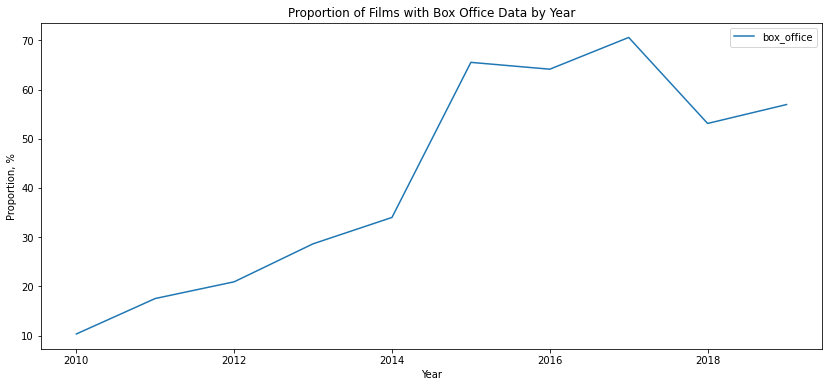

In [30]:
pivot_years = data.pivot_table(index = 'year', values = 'box_office', aggfunc = lambda x: (x.count()/x.size) * 100)

display(pivot_years)

pivot_years.plot(figsize = (14, 6))
plt.title('Proportion of Films with Box Office Data by Year')
plt.xlabel('Year')
plt.ylabel('Proportion, %')
plt.show()

The most complete information about the years is presented from 2015 to 2018.
	

- How the box office dynamics changed over the years. 
- In which year was the box office revenue the lowest? And the highest?

In [ ]:
pivot_years_median = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['median', 'sum', 'count'])

display(pivot_years_median)

print(len(data[data['box_office'] < 1000000]))

In [ ]:
display(data[(data['year'] == 2019) & (data['box_office'] < 100000)].head(30))

Change in box office dynamics over the years

In [2]:
pivot_years_sum = data.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
#pivot_years_sum = pivot_years_sum['box_office'].where('b')
display(pivot_years_sum)

NameError: name 'data' is not defined

Visualize the total box office revenue dynamics over the years

In [ ]:
pivot_years_sum.plot(kind='bar', figsize=(14, 6))
plt.title('Сумма сборов по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма сборов')
plt.show()



Use a pivot table to calculate the average and median box office revenue for each year.

In [ ]:
# Median and sum by year
pivot_years_median = data.pivot_table(index='year', values='box_office', aggfunc=['median', 'sum', 'count'])

# For films with low revenues that might be less than 100,000, normalization can be done
data.loc[data['box_office'] < 100000, 'box_office'] = data.loc[data['box_office'] < 100000, 'box_office'] * 1000

pivot_years_median = data.pivot_table(index='year', values='box_office', aggfunc=['median', 'sum', 'count'])

display(pivot_years_median)

Despite the overall growth, the median box office revenues remain stable or grow more slowly, indicating an increase in the number of films with low or medium earnings. This reflects the high competition in the film market.

Thus, 2015 and 2016 are the record years for total box office revenue, but the growth in the number of films with smaller earnings could explain the decrease in median values in recent years.

The median value is often lower than the mean because there is a large number of films with low earnings, along with some films with abnormally high earnings. 

In [ ]:
pivot_years_sum = data.pivot_table(index='year', values='box_office', aggfunc='sum')

# Visualize the total box office revenue dynamics over the years
pivot_years_sum.plot(kind='bar', figsize=(14, 6))
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Box Office Revenue')
plt.show()

Determine whether the age restriction (“6+”, “12+”, “16+”, “18+”, etc.) affects the box office revenue of films between 2015 and 2019. Which films with which age restrictions earned the most at the box office? Does the picture change depending on the year? If so, hypothesize what it might be related to.

In [ ]:
# Filter data
data15_19 = data[(data['show_start_date'].dt.year >= 2015) & (data['show_start_date'].dt.year <= 2019)]

age_box_office = data15_19.groupby('age_restriction')['box_office'].sum().sort_values(ascending=False)
display(age_box_office)

# Visualization
age_box_office.plot(kind='bar', title='Total Box Office Revenue by Age Restriction', figsize=(10, 6))
plt.xlabel('Age Restriction')
plt.ylabel('Box Office Revenue')
plt.show()

It is noted that the films with a “16+” age restriction earned the most. The least were those with no age restriction, which refers to animated films/children’s movies.

In [ ]:
yearly_age_box_office = data15_19.groupby([data15_19['show_start_date'].dt.year, 'age_restriction'])['box_office'].sum().unstack()

# Visualization
yearly_age_box_office.plot(kind='bar', stacked=True, figsize=(14, 7), title='Total Box Office Revenue by Age Restriction by Year')
plt.xlabel('Year')
plt.ylabel('Box Office Revenue')
plt.legend(title='Age Restriction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It is noted that the structure of revenues based on age restrictions did not change much. The proportions remained roughly the same. The category “12+” saw the most change in percentage of box office revenue— in 2015, it was the most significant.


### Intermediate Conclusion for the “Exploratory Data Analysis” Section

### Goals and objectives of the section:

The goal of this section was to conduct an exploratory analysis of movie data from 2010 to 2019, focusing on the number of films, box office dynamics, age restrictions, and their impact on box office revenues.

The analysis of movie data from 2010 to 2019 reveals the following key findings:

1.	**Number of movies released per year**:
- 	The number of films with box office information significantly increased starting in 2015. A sharp rise is particularly noticeable in 2015 when the number of films exceeded 450, and in 2016 and 2019, it reached more than 500.
- 	However, the proportion of films with box office data remains below 50%, indicating insufficient completeness of data in this category for most films.
    
2.	**Box office dynamics over the years**:
-	The total box office revenue showed steady growth, especially in 2015-2016 when total revenue exceeded 40 billion rubles per year. This reflects the growth of the industry, but also an increase in the number of films with lower or moderate earnings, which lowers the median values.
-	Median box office values have remained stable or have grown more slowly, which could indicate high competition in the film industry, with a growing number of films generating lower revenues, along with the influence of abnormally successful films.

3.	**Age restrictions and their impact on box office revenue**:
-	Films with a “16+” age rating earned the highest box office revenue, while films with a “0+” rating (for all audiences) significantly lagged behind, primarily due to animated films and children’s movies.
-	In the dynamics of box office revenue by age rating from 2015 to 2019, the structure did not undergo significant changes. The “12+” category became more noticeable in 2015, but its share declined over time.

The results confirm the hypothesis of the expansion of the film industry between 2015 and 2019, with an increase in the number of films and total revenue, despite the presence of films with lower box office earnings. The median box office values also demonstrate high competition in the market.

Thus, movie data from 2015 onward provides the most complete picture, and it can be concluded that the film industry significantly expanded during these years, despite the presence of films with less significant box office earnings.


### Explore movies that received government support

At this stage, there are no specific instructions or tasks—look for interesting patterns in the data. See how much funding is allocated for movie support. Check if such movies are profitable, and what their ratings are.

Let’s calculate the total amount of government support.

We will look at: 
 - The total amount of refundable and non-refundable support.
 - The average budget of movies with government support.

In [ ]:
# Total amount of refundable and non-refundable support
total_refundable_support = data['refundable_support'].sum()
total_nonrefundable_support = data['nonrefundable_support'].sum()
total_support = total_refundable_support + total_nonrefundable_support

print(f"Total refundable support: {total_refundable_support}")
print(f"Total non-refundable support: {total_nonrefundable_support}")
print(f"Total government support: {total_support}")

# Average budget of movies with government support
average_budget = data['budget'].mean()
print(f"Average budget of movies with government support: {average_budget}")

Let’s evaluate the profitability of the movies.

We will compare:
-  The movie’s box office earnings with its budget.
- Calculate the profitability ratio (box office / budget).
- Look at the percentage of profitable movies (ratio > 1).

In [ ]:
# Убедимся, что сборы и бюджет имеют числовой формат
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

# Ensure box office and budget are in numeric format
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

# Remove rows with missing values in box office and budget data
movies_with_data = data.dropna(subset=['box_office', 'budget']).copy()

# Calculate profitability ratio
movies_with_data['profitability_ratio'] = movies_with_data['box_office'] / movies_with_data['budget']

# Comparison of box office and budget (average values)
average_box_office = movies_with_data['box_office'].mean()
average_budget = movies_with_data['budget'].mean()
average_profitability_ratio = movies_with_data['profitability_ratio'].mean()

# Percentage of profitable movies (profitability ratio > 1)
profitable_movies = movies_with_data[movies_with_data['profitability_ratio'] > 1]
percentage_profitable = len(profitable_movies) / len(movies_with_data) * 100

# Display results
print(f"Average box office revenue: {average_box_office:.2f} rub.")
print(f"Average movie budget: {average_budget:.2f} rub.")
print(f"Average profitability ratio: {average_profitability_ratio:.2f}")
print(f"Percentage of profitable movies: {percentage_profitable:.2f}%")

# Display the first few rows for visual analysis
display(movies_with_data[['title', 'box_office', 'budget', 'profitability_ratio']].sort_values(by='profitability_ratio', ascending=False).head(10))
display(movies_with_data[['title', 'box_office', 'budget', 'profitability_ratio']].head())

#### **Interim Conclusion.**
 
 
- 	**Government support**:
    - Refundable: 3.655 million rubles, non-refundable: 15.153 million rubles, total: 18.808 million rubles.
    - The majority of the support is non-refundable, indicating significant investments in the film industry.
- 	Average movie budget: 134 million rubles. Films with support have large budgets intended for large-scale projects.
-    **Profitability**:
    - Average box office earnings: 134 million rubles, average profitability ratio: 0.84.
    - Percentage of profitable movies: 25.75%. Most movies remain unprofitable.

Successful projects: “Kholop” (19.21), “Ice” (9.73), and others show that even high-budget projects can be extremely profitable with successful marketing and high popularity.

Unsuccessful projects: Movies with a profitability ratio close to 0 (such as “Still Alive”) suffer from low audience interest or insufficient promotion.

Let’s explore movie ratings.

We’ll look at: 
-  The average rating of movies with government support.
-  The correlation between the rating and the amount of support.
-  A comparison with movies without government support.


In [ ]:
# Average rating of movies with government support
movies_with_support = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]
average_rating_with_support = movies_with_support['ratings'].mean()
print(f"Average rating of movies with government support: {average_rating_with_support:.2f}")

In [3]:
import warnings

# Total support (refundable + non-refundable)
movies_with_support.loc[:, 'total_support'] = movies_with_support['refundable_support'] + movies_with_support['nonrefundable_support']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(movies_with_support['total_support'], movies_with_support['ratings'], color='blue', alpha=0.5)
plt.title('Relationship between ratings and total government support')
plt.xlabel('Amount of government support')
plt.ylabel('Movie rating')
plt.grid(True)
plt.show()

# Displaying statistics for analysis
total_support_stats = movies_with_support['total_support'].describe()
ratings_stats = movies_with_support['ratings'].describe()

print("Statistics for total government support:")
print(total_support_stats)

print("\nStatistics for movie ratings:")
print(ratings_stats)

# Movies without government support
movies_without_support = data[data['refundable_support'].isna() & data['nonrefundable_support'].isna()]

# Average rating for movies with and without support
average_rating_without_support = movies_without_support['ratings'].mean()

print(f"Average rating of movies without government support: {average_rating_without_support:.2f}")
warnings.filterwarnings("ignore")

NameError: name 'movies_with_support' is not defined

In [ ]:
# Movies without government support
movies_without_support = data[data['refundable_support'].isna() & data['nonrefundable_support'].isna()]

# Average rating for movies with and without support
average_rating_without_support = movies_without_support['ratings'].mean()

print(f"Average rating of movies without government support: {average_rating_without_support:.2f}")

**Interim Conclusion** 

 1.	Average rating of movies with government support: Movies that received government support have an average rating of 6.04. This is slightly lower than the rating of movies without support, which may indicate that support does not always correlate with high audience ratings.
 2.	Relationship between rating and amount of support: Visually, there is a weak correlation between the amount of government support and the movie’s rating. The ratings of movies vary independently of the amount of funding allocated, suggesting that other factors influence how the movie is perceived.
 3.	Comparison with movies without government support: The average rating of movies without government support is 6.51, which is higher than the average rating of movies with support (6.04). This supports the hypothesis that movies without government support may be more successful in terms of audience ratings, possibly due to greater independence in project selection and higher expectations for such movies.

Thus, while government support can be helpful for film production, it does not always guarantee success in the eyes of viewers, and there is a tendency for movies without support to have slightly higher ratings.


**It would also be interesting to explore which genres receive government support.**

In [ ]:
# Analysis of Movie Genres with Government Support

genre_support = movies_with_support['genres'].value_counts()
print("Genres of movies with government support:")
print(genre_support)

The most common genres are “drama” and “comedy.”

## Interim Findings for the “Exploratory Data Analysis” Section, where we analyzed films that received government support.


During the analysis of movie data, we identified several interesting trends:

	1.	Number of Films in Distribution: We noticed that data on box office performance became more complete starting in 2015, when the proportion of films with box office data significantly increased. For example, in 2010, less than 11% of films had box office data, but by 2015, this figure had reached 65%. This indicates that box office information has become more accessible and comprehensive in recent years.
    
	2.	Total Box Office by Year: Observations of box office trends showed that since 2015, box office earnings from films in distribution have significantly increased. In 2010, the total box office revenue was just over half a billion rubles, but by 2015, it exceeded 40 billion rubles. Interestingly, 2016 and 2017 showed nearly identical earnings, with a slight increase in 2018.
    
	3.	Age Ratings and Box Office: According to data from 2015–2019, films with the age rating “16+” earned the most on average, while films with the “0+” category (suitable for all audiences) had the lowest earnings. At the same time, the revenue structure by age categories has remained stable over the years. It is important to note that films with the age rating “12+” had the highest percentage of box office revenue in 2015.
    
	4.	Government Support: The average budget for films with government support was around 134 million rubles, indicating that these projects generally have higher budgets than films without support. However, despite the large investments, the profitability of such films remained at 25%, meaning that many of them did not generate a profit. Interestingly, films with government support tend to receive slightly lower audience ratings compared to films without support, which could be attributed to various production and promotion factors.
    
	5.	Genres of Films with Government Support: Among films with government support, the most popular genres were drama and comedy. This suggests that these genres attract the most interest from government support, possibly due to their broad appeal and attractiveness to a wide audience.
    
    
Overall, the data shows that while government support and large investments can be beneficial for large-scale projects, a film’s success depends on many factors, such as genre, marketing, and audience interest.


# General Conclusion for the Project

During the course of the project, which covers data processing and exploratory analysis of movies from 2010 to 2019, several key conclusions were made that can be useful for further research and practical application in the film industry.

  **1. Data Processing**

During data processing, several steps were taken to improve data quality and standardize its representation:

- **Categorical Data:** Extra spaces were removed from the `type` column, which significantly reduced the number of unique values and improved data consistency. The `production_country` column was standardized by adjusting country delimiters, which also improved unification. The `genres` column was simplified by keeping only the first genre for each movie, allowing us to focus on the most popular genres and simplifying further analysis.

- **Quantitative Data:** Outliers were identified in the `nonrefundable_support`, `refundable_support`, `budget`, and `box_office` columns. These outliers did not have a significant impact on the overall analysis but were considered. For example, outliers in the `nonrefundable_support` column can be explained by large and long-term projects, while outliers in the `refundable_support` column are associated with exceptional cases. Despite this, the data was cleaned and prepared for analysis, which improved the accuracy of the conclusions.

- **Other:** Additional intermediate columns were created to facilitate further analysis and conclusions. As a result of the processing, the data became cleaner and more standardized, allowing for more accurate and effective research.


  **2. Exploratory Data Analysis**

Key Findings:

- **Number of Movies by Year:** The number of movies with box office data significantly increased starting from 2015. The growth was particularly noticeable in 2015, when the number of films with available box office information exceeded 400, and by 2019 it reached over 500. However, the proportion of such films remained below 50%, indicating incomplete data for most films.

- **Box Office Dynamics by Year:** Between 2015 and 2016, total box office revenues showed steady growth, and by 2019, total box office revenue significantly exceeded 30 billion rubles. Median box office values, however, remained more stable or grew slowly, indicating high competition in the film industry, where the number of films with lower earnings increased, but this was still balanced by abnormally successful films.

- **Age Ratings and Box Office Impact:** Movies with the “16+” age rating earned the most on average, which is related to their broad audience. In contrast, films with the “0+” category (for all audiences) lagged behind in earnings, mostly due to animated and children’s films. In 2015, the “12+” category had the highest percentage of box office revenue, but its share decreased over time, which may also be related to changes in viewer preferences.

  **3.  Government Support**

- **Budget of Movies with Government Support:** The average budget for such films was around 134 million rubles, indicating that they typically have higher budgets than films without government support. However, despite large investments, the profitability of these projects remained at 25%. This suggests that most government-supported films did not generate significant profit.

- **Viewer Ratings:** An interesting conclusion is that films with government support have slightly lower viewer ratings compared to films without such support. This may be due to differences in production and marketing approaches, as well as the nature of genres and themes that receive government funding.

- **Genres of Movies with Government Support:** Among films with government support, drama and comedy, as well as their combinations such as “comedy, melodrama” and “drama, melodrama”, are the most common genres. This may indicate that these genres are the most popular among government-supported films, possibly due to their broad appeal and ability to attract a wide audience.

  **4. Trends by Genre**


- **Popular Genres:** For films with government support, the most common genres are drama and comedy. This also suggests a tendency for government support to fund mass-market, more accessible films that can attract a broader audience.


`The project helped identify several key trends and patterns that influence the development of the film industry, including:`

- The film industry has shown significant growth since 2015, reflected in both the number of films and box office revenue.
- Box office information has become more complete and accessible each year, enabling more accurate assessments of movie success.
- While government support helps films have higher budgets, the success of these projects does not always justify the investment, and government-supported films tend to have lower viewer ratings on average.
- Age ratings have a significant impact on box office revenue, with “16+” rated films showing the highest earnings.
- For most projects, the success of a film depends on many factors, including genre, marketing, and target audience.



Thus, the analysis provided a more complete picture of the development of the film industry in Russia and highlighted the importance of various factors in determining a film’s success.